In [108]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

#        
corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

#    
midpoints = [(corners[(i + 1) % 3] + corners[(i + 2) % 3]) / 2.0 for i in range(3)]

def xy2bc(xy, tol=1.e-3):
    #                    
    s = [(corners[i] - midpoints[i]).dot(xy - midpoints[i]) / 0.75 for i in range(3)]
    return np.clip(s, tol, 1.0 - tol)

# With the center of gravity, you can calculate the value of the Dirichlet probability density function.
class Dirichlet(object):
    
    def __init__(self, alpha):
        from math import gamma
        from operator import mul
        from functools import reduce
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / reduce(mul, [gamma(a) for a in self._alpha]) #reduce: Sequence Continuous Use Function
        
    def pdf(self, x):
        # Return the probability density function value
        from operator import mul
        from functools import reduce
        return self._coef * reduce(mul, [xx ** (aa - 1) for (xx, aa)in zip(x, self._alpha)])
    
def draw_pdf_contours(dist, nlevels=200, subdiv=8, **kwargs):
    import math
    
    #              
    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, cmap='jet', **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.xlabel('a = {}'.format(str(dist._alpha)), size=12)
  

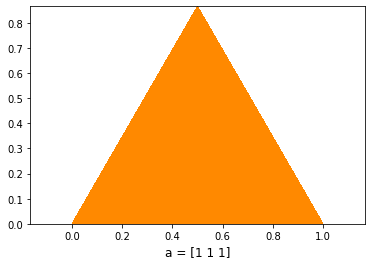

In [109]:
draw_pdf_contours(Dirichlet([1,1,1]))

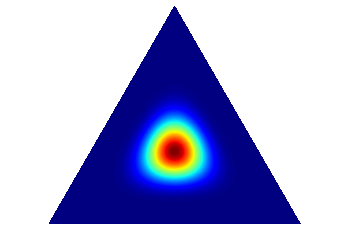

In [64]:
draw_pdf_contours(Dirichlet([10,10,10]))

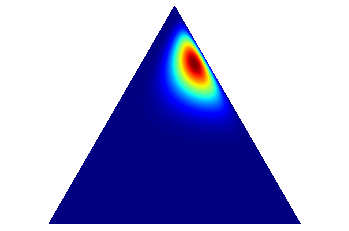

In [65]:
draw_pdf_contours(Dirichlet([2,5,15]))

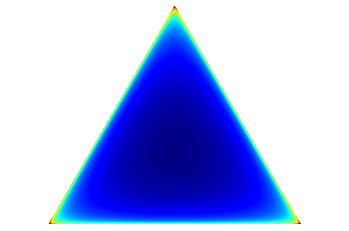

In [41]:
draw_pdf_contours(Dirichlet([.9999,.9999,.9999]))

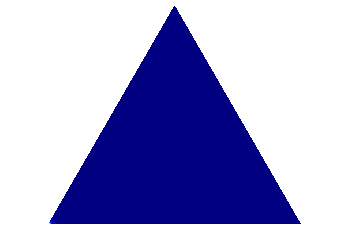

In [45]:
draw_pdf_contours(Dirichlet([10, 0.1,.1]))

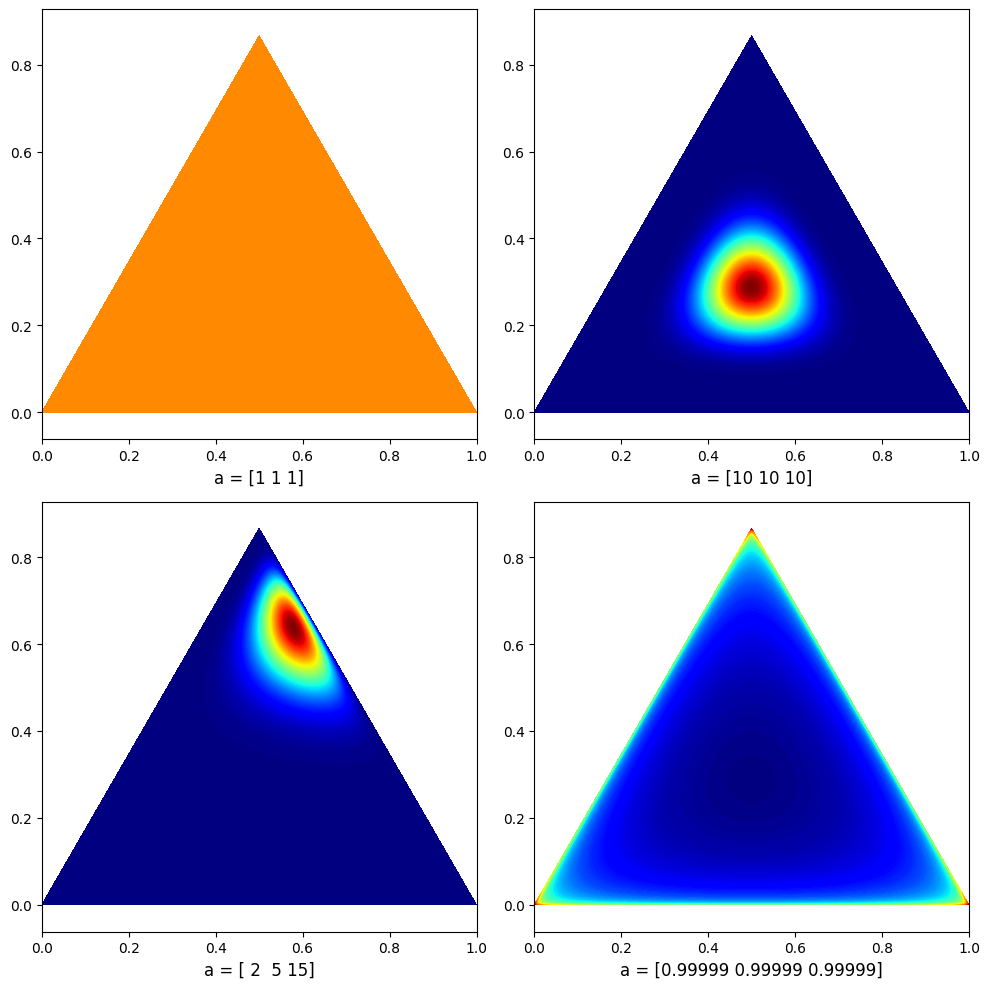

In [111]:
plt.figure(figsize=(10, 10), dpi=100)

ax = plt.subplot(2,2,1)
draw_pdf_contours(Dirichlet([1,1,1]))

plt.subplot(2,2,2)
draw_pdf_contours(Dirichlet([10,10,10]))
plt.subplot(2,2,3)
draw_pdf_contours(Dirichlet([2,5,15]))
plt.subplot(2,2,4)
draw_pdf_contours(Dirichlet([.99999,.99999,.99999]))
plt.tight_layout()

plt.savefig('./dir_example_k_eq_3')

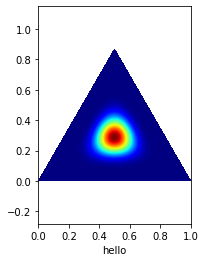

In [91]:
plt.subplot(2,2,1)
draw_pdf_contours(Dirichlet([10,10,10]))
plt.subplot(1,2,1)
draw_pdf_contours(Dirichlet([10,10,10]))

'[1 1 1]'